In [13]:
import pandas as pd

Load Dataset

In [14]:
data=pd.read_csv(r".\loan_data.csv")

In [15]:
data

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


Check Data Types of each features -- correct or not

In [16]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  str    
 2   person_education                45000 non-null  str    
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  str    
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  str    
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  45000 non-n

Data Features Data Types are Correct

Remove Duplicates

In [17]:
# check duplicates present or not
data.duplicated().sum()


np.int64(0)

In [18]:
# to drop duplicates from the dataset . in this case it is optional as there is no duplicates presents
data.drop_duplicates(inplace=True)

Missing Values

In [19]:
data.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

 no missing values in this dataset so avoid drop the missing values

Describe data range of each feature

In [22]:
data.describe()


,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


1. age > 100 may be a corrupted data so drop that rows


In [24]:
data['person_age'].max()

np.float64(144.0)

In [25]:
data = data[data['person_age'] < 100]


In [26]:
data['person_age'].max()

np.float64(94.0)

In [30]:
data.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,44993.000000,4.499300e+04,44993.000000,44993.000000,44993.000000,44993.000000,44993.000000,44993.000000,44993.000000
mean,27.748428,7.990845e+04,5.394528,9583.176761,11.006448,0.139736,5.866557,632.585713,0.222257
std,5.909737,6.332213e+04,5.927159,6314.802655,2.978985,0.087207,3.877167,50.402411,0.415767
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.719500e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704600e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.577800e+04,8.000000,12237.000000,12.990000,0.190000,8.000000,670.000000,0.000000
max,94.000000,2.448661e+06,76.000000,35000.000000,20.000000,0.660000,30.000000,784.000000,1.000000


Check if emp_experience is greater than the person age


In [31]:
(data['person_emp_exp'] > data['person_age']).sum()


np.int64(0)

Check if feature values lesser than 0 or not . if yes than remove it 

In [32]:
(data[['person_income','loan_amnt','credit_score','loan_int_rate']] <= 0).sum()


person_income    0
loan_amnt        0
credit_score     0
loan_int_rate    0
dtype: int64

Drop Unnecessary Data Features 

In [21]:
# data features
data.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='str')

In [52]:
data['person_education'].unique()

<StringArray>
['Master', 'High School', 'Bachelor', 'Associate', 'Doctorate']
Length: 5, dtype: str

GRAPHS

In [58]:
data['cb_person_cred_hist_length'].value_counts()

cb_person_cred_hist_length
4.0     8652
3.0     8310
2.0     6536
5.0     3082
6.0     2966
7.0     2889
8.0     2800
9.0     2685
10.0    2457
12.0     715
11.0     712
14.0     644
13.0     625
15.0     557
16.0     542
17.0     469
20.0      43
18.0      34
24.0      33
22.0      31
28.0      29
19.0      29
23.0      26
21.0      24
27.0      23
30.0      23
25.0      22
26.0      20
29.0      15
Name: count, dtype: int64

In [47]:
import matplotlib.pyplot as plt      
import seaborn as sns

Boxplot 


Numeric - Categorical Relation

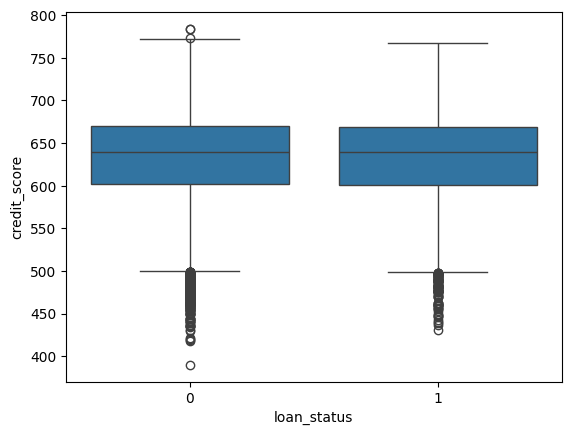

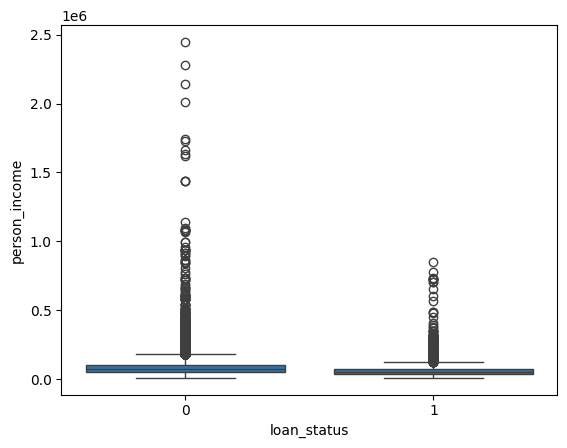

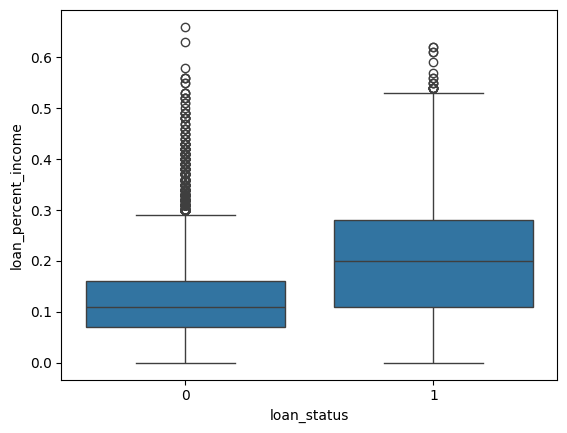

In [61]:
sns.boxplot(x='loan_status', y='credit_score', data=data)
plt.show()
sns.boxplot(x='loan_status', y='person_income', data=data)
plt.show()
sns.boxplot(x='loan_status', y='loan_percent_income', data=data)
plt.show()


Categorical - laon_status relation

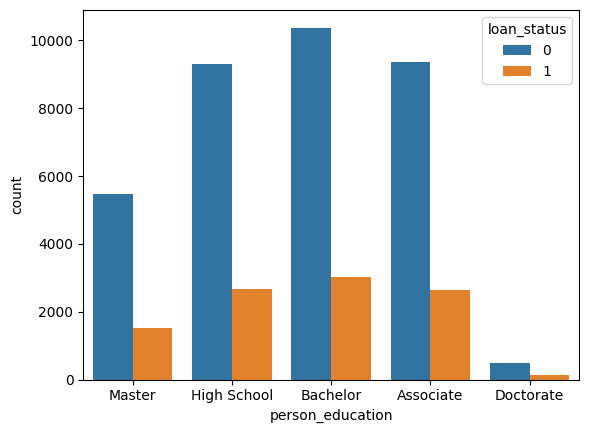

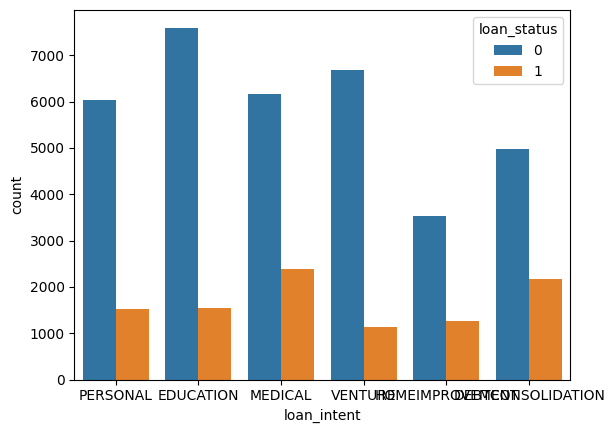

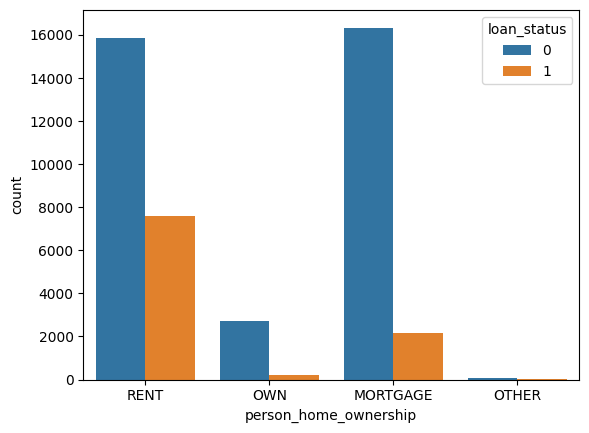

In [62]:
sns.countplot(x='person_education', hue='loan_status', data=data)
plt.show()
sns.countplot(x='loan_intent', hue='loan_status', data=data)
plt.show()
sns.countplot(x='person_home_ownership', hue='loan_status', data=data)
plt.show()


Numeric - Numeric Relations

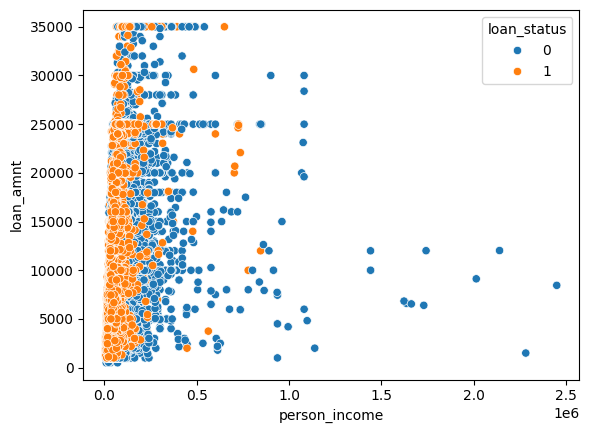

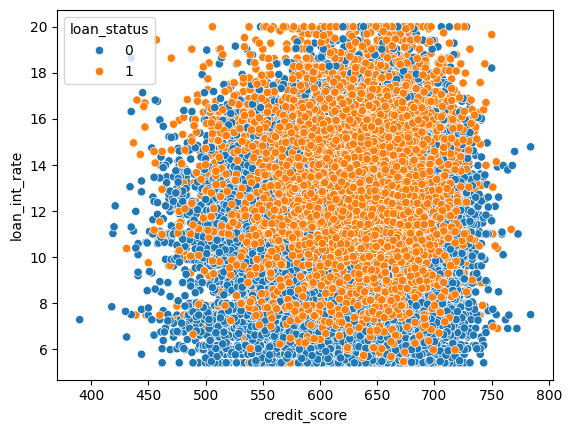

In [63]:
sns.scatterplot(x='person_income', y='loan_amnt', hue='loan_status', data=data)
plt.show()
sns.scatterplot(x='credit_score', y='loan_int_rate', hue='loan_status', data=data)
plt.show()
